<h1>Task 03 <\h1>

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

columns in the dataset:
age:age of the each individual person.

job:job type of individual.

marital:marital status of the individual.

education:education background of the person.

default:whether each individual has credit in default.

balance:account balance of the individual.

housing:whether the individual has a housing loan.

loan:whether the individual has a personal loan.

contact:Describes the mode of communication used to contact the individual, such as cellular, telephone, etc.

day:Represents the day of the month when the client was last contacted.

month:Indicates the month of the year when the client was last contacted.

duration:Represents the duration of the last contact (in seconds) with the client during the marketing campaign.

campaign:Represents the number of contacts performed during this campaign for the individual.

pdays:Indicates the number of days that passed since the client was last contacted from a previous campaign.

previous:Represents the number of contacts performed before this campaign for the individual.

poutcome:Describes the outcome of the previous marketing campaign (success, failure, unknown).

y:This is often the target variable or the variable that we want to predict. It typically represents whether the client subscribed to a term deposit (yes/no).

Default, Importing All Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
     

Importing bank_marketing dataset as data.

In [2]:
data=pd.read_csv('bankfull.csv')

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Checking shape of the dataset:

In [5]:
data.shape

(45211, 17)


Finding to see the how many columns present in the dataset:

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


Checking Non-Null Count and Datatype of each column present in the bank_marketing dataset:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Checking Type of data present in each column:

In [9]:
data.age.unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [10]:
data.job.unique

<bound method Series.unique of 0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object>

In [11]:
unknown_count=(data['job']=='unnown').sum()

In [13]:
print(f"Number of 'unknown' values in the 'poutcome' column: {unknown_count}")

Number of 'unknown' values in the 'poutcome' column: 0


In [15]:
data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [16]:
data.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)


replace nan values with mode value:

In [17]:
data['job'].fillna(data['job'].mode()[0], inplace=True)


In [18]:
data['education'].fillna(data['education'].mode()[0], inplace=True)
     

In [19]:
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [20]:
data.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

Finding outliers in numeric columns:

In [21]:
def count_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

# Iterate through each column in the DataFrame
for column in data.columns:
    if data[column].dtype in [np.int64, np.float64]:  # Only consider numerical columns
        total_outliers = count_outliers_iqr(data[column])
        print(f"Total outliers in {column}: {total_outliers}")

Total outliers in age: 487
Total outliers in balance: 4729
Total outliers in day: 0
Total outliers in duration: 3235
Total outliers in campaign: 3064
Total outliers in pdays: 8257
Total outliers in previous: 8257


Distribution of numeric colums:

<Axes: xlabel='age', ylabel='Count'>

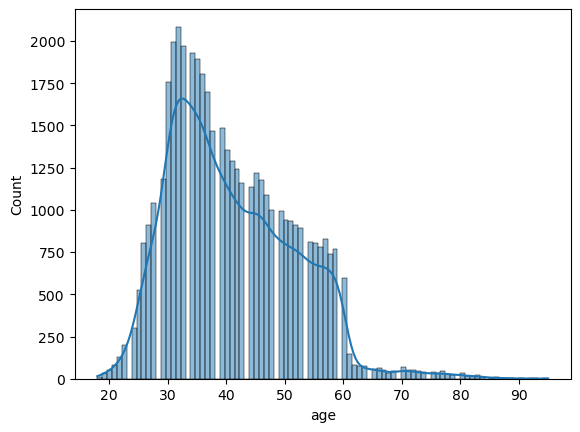

In [22]:
sns.histplot(x = data['age'],kde = True)

<Axes: xlabel='balance', ylabel='Count'>

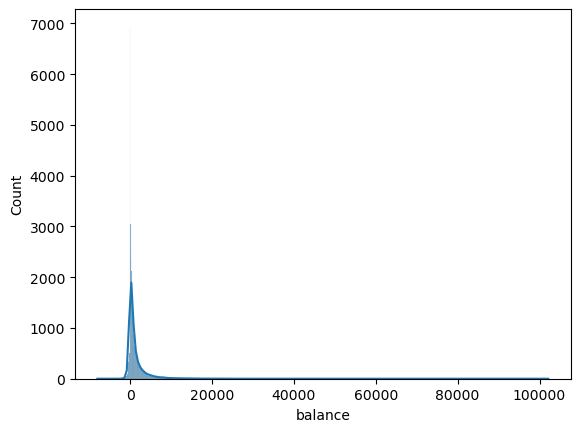

In [23]:
sns.histplot(x = data['balance'],kde = True)

<Axes: xlabel='day', ylabel='Count'>

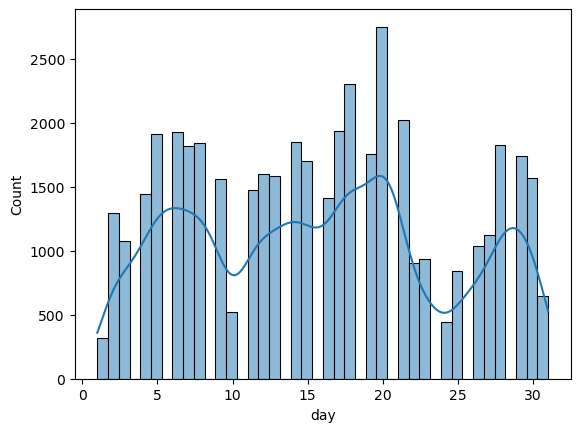

In [24]:
sns.histplot(x = data['day'],kde = True)

<Axes: xlabel='duration', ylabel='Count'>

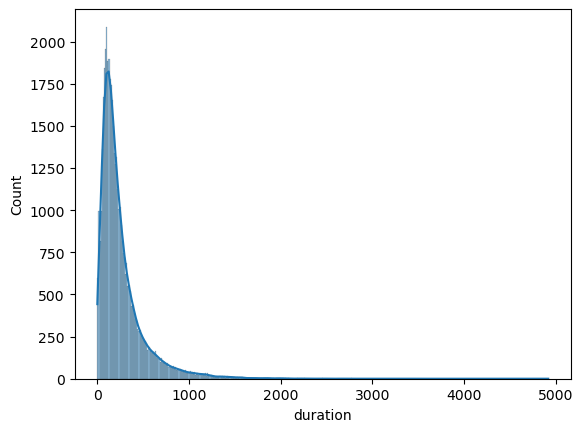

In [25]:


sns.histplot(x = data['duration'],kde = True)

<Axes: xlabel='campaign', ylabel='Count'>

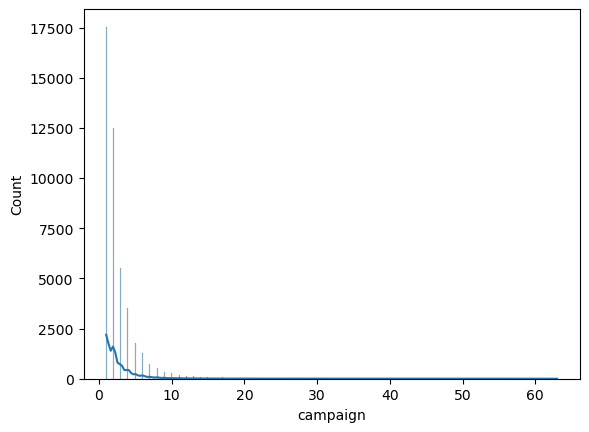

In [26]:

sns.histplot(x = data['campaign'],kde = True)
     

<Axes: xlabel='pdays', ylabel='Count'>

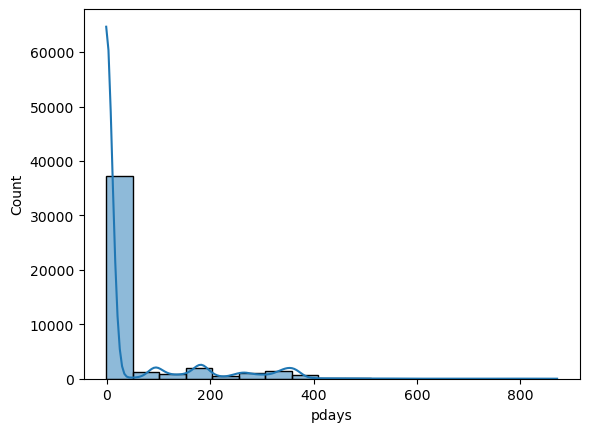

In [27]:
sns.histplot(x = data['pdays'],kde = True)

<Axes: xlabel='previous', ylabel='Count'>

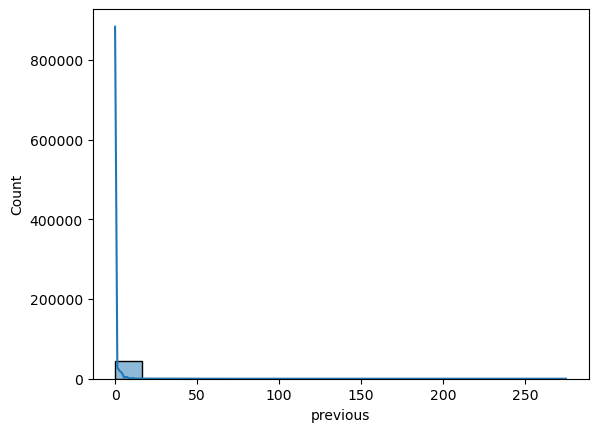

In [28]:
sns.histplot(x = data['previous'],kde = True)

<Axes: >

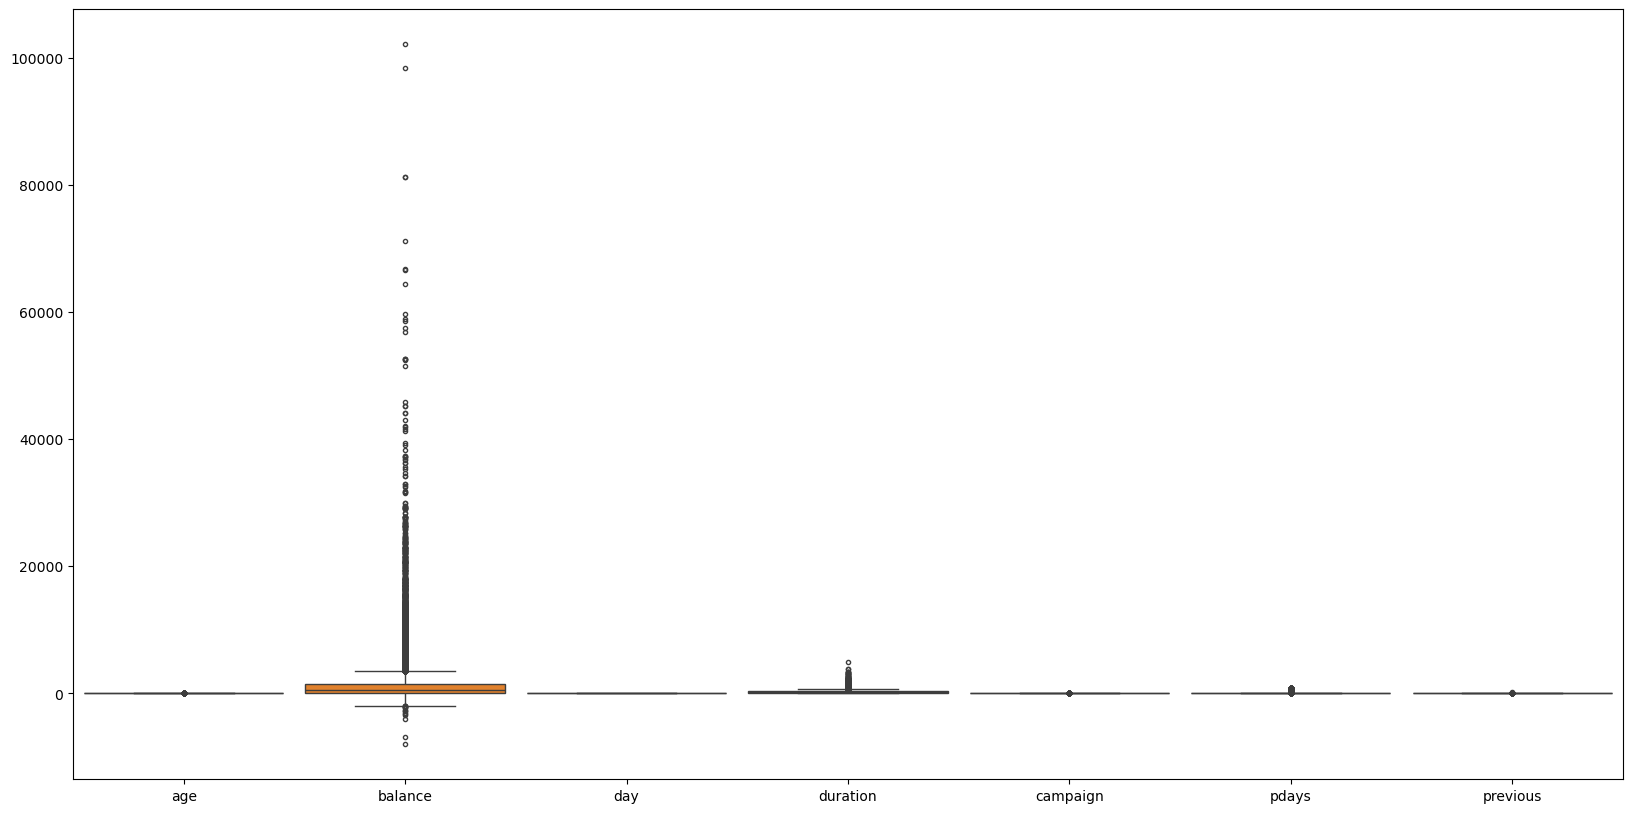

In [29]:
fig,ax = plt.subplots(figsize = (20,10))
sns.boxplot(data = data,width = 0.9,fliersize = 3)

Checking zeros in the dataset columnwise:


In [30]:
zeros_sum = (data== 0).sum()

Selecting Independent variables:

In [31]:

X = data[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']]
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


Performing Dummy Encoding for Categorical data columns for the Indepenent variables:

In [32]:
X = pd.get_dummies(X,columns=['job','marital','education','default','housing','loan','contact','month','poutcome'])
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,False,False,True,...,False,False,True,False,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
45207,71,1729,17,456,2,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
45208,72,5715,17,1127,5,184,3,False,False,False,...,False,False,False,True,False,False,False,False,True,False
45209,57,668,17,508,4,-1,0,False,True,False,...,False,False,False,True,False,False,False,False,False,True


Performing StandardScaling:

In [34]:
columns_to_scale = ['age','balance','day','duration','campaign','pdays','previous']
scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])
     

In [35]:
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940,False,False,True,...,False,False,True,False,False,False,False,False,False,True
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940,False,True,False,...,False,False,True,False,False,False,False,False,False,True
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940,False,False,False,...,False,False,False,True,False,False,False,False,False,True
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940,False,False,False,...,False,False,False,True,False,False,False,False,False,True
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473,False,False,False,...,False,False,False,True,False,False,False,False,True,False
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940,False,True,False,...,False,False,False,True,False,False,False,False,False,True



Selecting Target Variable:

In [36]:
y = data[['y']]
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


Performing Dummy Encoding for Categorical data columns for the Target variable:

In [37]:

y = pd.get_dummies(y,columns=['y'])
y

,y_no,y_yes
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
45206,False,True
45207,False,True
45208,False,True
45209,True,False


Split the dataset into X_train, X_test, y_train, y_test:

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
     

In [39]:
X_train

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
33362,-0.182341,0.823628,0.503892,-0.722893,-0.569351,-0.411453,-0.251940,False,False,False,...,False,False,False,False,False,False,False,False,False,True
28229,-0.935732,-0.095007,1.585313,-0.684062,-0.569351,-0.411453,-0.251940,False,False,False,...,False,False,False,False,False,False,False,False,False,True
37952,-0.464863,-0.156425,-0.217055,0.403211,1.044601,-0.411453,-0.251940,True,False,False,...,False,False,True,False,False,False,False,False,False,True
43408,-2.065820,-0.318016,-1.298476,0.267302,0.076230,-0.411453,-0.251940,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9897,0.382703,-0.447419,-0.817845,-0.614166,-0.569351,-0.411453,-0.251940,False,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30403,-0.559037,-0.120625,-1.298476,-0.851036,-0.569351,-0.411453,-0.251940,False,False,False,...,False,False,False,False,False,False,False,False,False,True
21243,-0.559037,-0.201092,0.263576,-0.097711,2.981343,-0.411453,-0.251940,False,False,False,...,False,False,False,False,False,False,False,False,False,True
42613,-0.559037,-0.341334,-0.577529,0.011016,-0.246560,-0.411453,-0.251940,False,False,False,...,False,False,False,False,False,False,False,False,False,True
43567,2.737053,-0.245103,1.344997,-0.423893,-0.246560,1.416214,0.182198,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [40]:
X_test

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
14001,-0.370689,0.013377,-0.697687,-0.649114,3.949713,-0.411453,-0.251940,False,False,False,...,False,False,False,False,False,False,False,False,False,True
32046,-0.464863,-0.530514,-0.217055,3.164108,-0.569351,-0.411453,-0.251940,False,False,False,...,False,False,False,False,False,False,False,False,False,True
13318,0.571051,-0.580764,-0.938003,-0.058880,0.721811,-0.411453,-0.251940,False,True,False,...,False,False,False,False,False,False,False,False,False,True
42991,1.512791,-0.282873,-0.577529,-0.594750,1.367391,1.476138,0.616335,False,False,False,...,False,False,False,False,False,False,True,False,False,False
14237,-0.747384,-0.580764,-0.217055,0.286718,-0.246560,-0.411453,-0.251940,False,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,-0.370689,0.837751,-0.817845,-0.707361,-0.246560,-0.411453,-0.251940,True,False,False,...,True,False,False,False,False,False,False,False,False,True
37898,-0.464863,-0.535112,-0.217055,-0.618049,1.367391,3.114047,0.182198,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1080,-0.370689,-0.447419,-1.058161,-0.567569,0.399020,-0.411453,-0.251940,False,False,False,...,False,False,True,False,False,False,False,False,False,True
17950,0.006007,-0.238534,1.705471,-0.691828,-0.246560,-0.411453,-0.251940,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [41]:
y_train

,y_no,y_yes
33362,True,False
28229,True,False
37952,True,False
43408,False,True
9897,True,False
...,...,...
30403,True,False
21243,True,False
42613,False,True
43567,True,False


Model:DecisionTreeClassifier

In [42]:
# Initialize your model
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Make predictions on the testing set
test_predictions = model.predict(X_test)

# Calculate training accuracy
DecisionTreeClassifier_train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {DecisionTreeClassifier_train_accuracy}')

# Calculate testing accuracy
DecisionTreeClassifier_test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Testing Accuracy: {DecisionTreeClassifier_test_accuracy}')

print("\nClassification Report (Training Data):")
print(classification_report(y_train, train_predictions))

print("\nClassification Report (Testing Data):")
print(classification_report(y_test, test_predictions))

Training Accuracy: 1.0
Testing Accuracy: 0.8691497832433868

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29944
           1       1.00      1.00      1.00      3964

   micro avg       1.00      1.00      1.00     33908
   macro avg       1.00      1.00      1.00     33908
weighted avg       1.00      1.00      1.00     33908
 samples avg       1.00      1.00      1.00     33908


Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      9978
           1       0.44      0.47      0.46      1325

   micro avg       0.87      0.87      0.87     11303
   macro avg       0.69      0.69      0.69     11303
weighted avg       0.87      0.87      0.87     11303
 samples avg       0.87      0.87      0.87     11303

